**Why does the Top 100 Trending Spotify Song of 2017 so popular? Lets figure this out through their Audio Features**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

%matplotlib inline

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['featuresdf.csv']


In [13]:
data = pd.read_csv("../input/featuresdf.csv")
data.head(100)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.8130,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.4460,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.8110,80.924,288600.0,4.0
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
6,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.119000,0.000000,0.0864,0.5150,99.968,220781.0,4.0
7,3B54sVLJ402zGa6Xm4YGN,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.029300,0.010100,0.1040,0.7330,97.985,233902.0,4.0
8,0KKkJNfGyhkQ5aFogxQAP,That's What I Like,Bruno Mars,0.853,0.560,1.0,-4.961,1.0,0.0406,0.013000,0.000000,0.0944,0.8600,134.066,206693.0,4.0
9,3NdDpSvN911VPGivFlV5d,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,0.735,0.451,0.0,-8.374,1.0,0.0585,0.063100,0.000013,0.3250,0.0862,117.973,245200.0,4.0


# This is the table featuring the Top 100 Spotify Tracks

In [2]:
data = pd.read_csv("../input/featuresdf.csv")
data.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


# THE TOP 5 ROWS ARE DISPLAYED BY HERE

In [3]:
data = pd.read_csv("../input/featuresdf.csv")
data.tail()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,0.675,0.690,2.0,-4.761,1.0,0.1320,0.210,0.000000,0.287,0.2720,137.817,239293.0,4.0
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,0.542,0.859,11.0,-5.651,1.0,0.1970,0.160,0.004660,0.137,0.4030,159.797,208053.0,4.0
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,0.731,0.469,5.0,-7.226,1.0,0.0326,0.463,0.000001,0.103,0.6310,98.963,165387.0,4.0
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,0.658,0.588,6.0,-4.902,0.0,0.0367,0.105,0.000001,0.125,0.4340,110.075,214802.0,4.0
99,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.0390,0.101,0.000001,0.106,0.0967,180.043,239000.0,4.0


# THE BUTTOM 5 ROWS ARE DISPLAYED BY HERE

In [5]:
data.shape

(100, 16)

# THE 100 ROWS AND 16 COLOUMNS IN YOUR DATA SET

In [7]:
data.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

# IT DISPLAY THE NAMES OF THE COLOUMNS

In [9]:
data.dtypes.value_counts()

float64    13
object      3
dtype: int64

# MY DATASET HAS 3 OBJECT COLOUMNS AND 13 NUMERICAL COLOUMNS

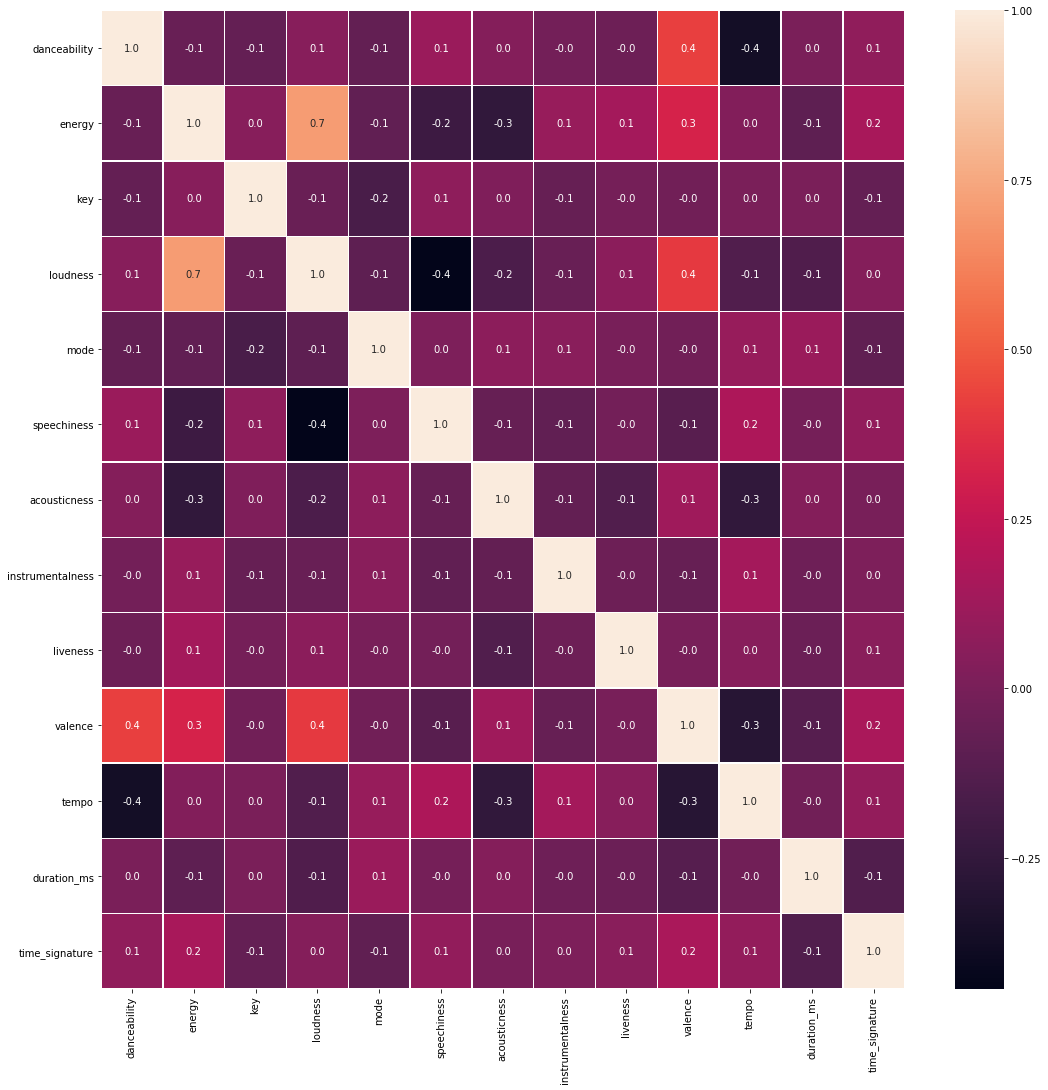

In [4]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# HEAT MAP OF TOP 100 SPOTIFY TRACKES

**Mean Values of the song's Audio Features**

Mean value for danceability: 0.6968199999999999


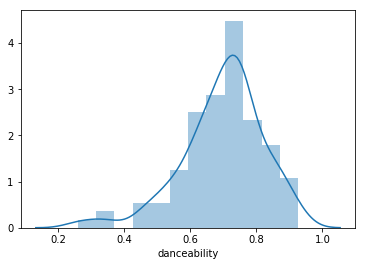

Mean value for energy: 0.6606899999999999


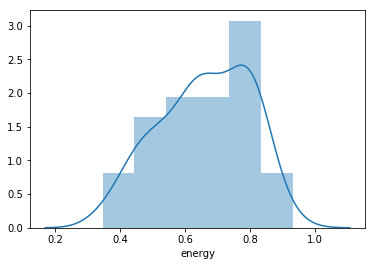

Mean value for mode: 0.58


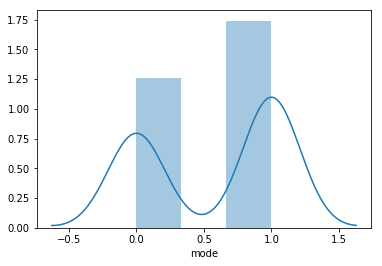

Mean value for speechiness: 0.10396899999999995


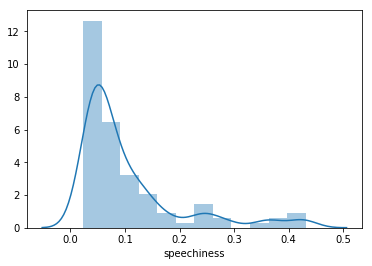

Mean value for acousticness: 0.16630649000000006


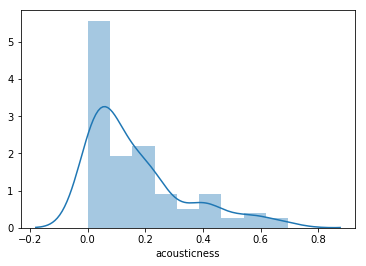

Mean value for instrumentalness: 0.0047961442


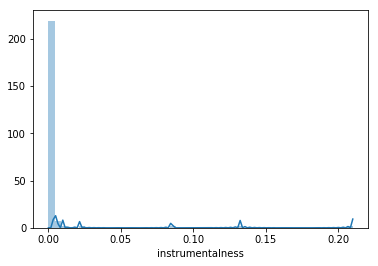

Mean value for liveness: 0.15060700000000002


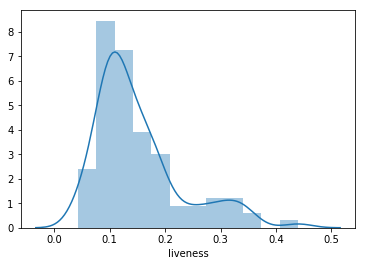

Mean value for valence: 0.5170489999999999


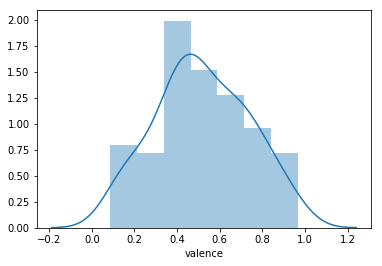

In [11]:
print("Mean value for danceability:", data['danceability'].mean())
sns.distplot(data['danceability'])
plt.show()
print("Mean value for energy:", data['energy'].mean())
sns.distplot(data['energy'])
plt.show()
print("Mean value for mode:", data['mode'].mean())
sns.distplot(data['mode'])
plt.show()
print("Mean value for speechiness:", data['speechiness'].mean())
sns.distplot(data['speechiness'])
plt.show()
print("Mean value for acousticness:", data['acousticness'].mean())
sns.distplot(data['acousticness'])
plt.show()
print("Mean value for instrumentalness:", data['instrumentalness'].mean())
sns.distplot(data['instrumentalness'])
plt.show()
print("Mean value for liveness:", data['liveness'].mean())
sns.distplot(data['liveness'])
plt.show()
print("Mean value for valence:", data['valence'].mean())
sns.distplot(data['valence'])
plt.show()

# IT GIVES THE MEAN VALUE OF danceability,energy, valence, liveness ,etc...

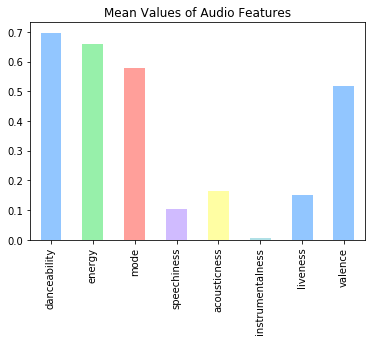

In [12]:
numeric = data.drop(['id','name','artists'], axis=1)
small = numeric.drop(['tempo','duration_ms','key','loudness','time_signature'], axis=1)
sns.set_palette('pastel')
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

# THE ABOVE GRAPH SHOWS MEAN VALUE OF AUDIO FEATURES

It's shown that most people that use Spotify, llisten to these certain songs that have more upbeat and entertaining music that is portrayed through their Audio Features such as "Danceablity", "Energy" and "Valence"

# CONCLUSION

WE HAVE TAKEN SPOTIFY DATASET :                            
1. THE DATASET SHOWS TOP 100 SPOTIFY TRACKES AND AUDIO FEATURES
2. IT CONSISTS OF DIFFERENT AUDIO FEATURES LIKE danceability,energy, valence, liveness,etc.......
3. THE DATA SET CONSISTS OF 100 ROWS AND 16 COLUMNS
4. IT HAS 3 OBJECT COLOUMNS AND 13 NUMERICAL COLOUMNS
5. DANCEBILITY HAS MORE MEAN VALUE THAN OTHER AUDIO FEATURES. 

